Курмашев Данил БПИ2303
Лабораторная работа №4: Обучению первой модели на TensorFlow для распознавания рукописных цифр на датасете MNIST:

Шаг 1: Загрузка и предобработка данных
- Импортируйте необходимые библиотеки: tensorflow и tensorflow.keras.datasets.mnist
- Загрузите датасет MNIST с помощью функции mnist.loaddata()
- Предобработайте данные: нормализуйте их, преобразуйте в нужный формат (например, масштабирование от 0 до 1)

Шаг 2: Создание нейронной сети
- Используйте модель Sequential из библиотеки tensorflow.keras.models
- Добавьте слои к модели: открытый слой Flatten с inputshape=(28, 28), полносвязанный слой Dense с 128 нейронами и функцией активации ReLU, полносвязанный слой Dense с 10 нейронами и функцией активации softmax

Шаг 3: Компиляция модели
- Компилируйте модель с оптимизатором 'adam', функцией потерь 'sparsecategoricalcrossentropy' и метрикой 'accuracy'

Шаг 4: Обучение модели
- Используйте метод fit для обучения модели на обучающем наборе данных с указанием числа эпох (например, 5 эпох)

Шаг 5: Оценка качества модели
- Используйте метод evaluate для оценки качества модели на тестовом наборе данных
- Выведите точность модели на тестовом наборе данных

Шаг 6: Анализ результатов
- Импортируйте библиотеку matplotlib.pyplot для построения графика
- Постройте график кривой обучения (accuracy) с помощью данных из истории обучения

Для начала импортируем библиотеки предварительно установив их. __future__ означает что код будет работать на разлиных версиях python

(x_train, y_train), (x_test, y_test) = mnist.load_data(): Загружает датасет MNIST и разделяет его на тренировочный и тестовый наборы данных.

x_train и x_test — это изображения рукописных цифр, а y_train и y_test — это метки классов (цифр от 0 до 9).

x_train, x_test = x_train / 255.0, x_test / 255.0: Нормализует изображения, деля все пиксели на 255, чтобы привести их в диапазон от 0 до 1.

In [9]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Загрузка датасета MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Предобработка данных
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential используется для последовательного создания модели Keras.

tf.keras.Input(shape=(28, 28)) Создает входной слой для Keras c входными данными размером 28 на 28 пикселей.

tf.keras.layers.Flatten() Добавляет слой "Flatten" в плоский массив для передачи в полносвязанный слой.

tf.keras.layers.Dense(128, activation='relu') Добавляет полносвязанный слой с 128 нейронами и функцией активации ReLU.

tf.keras.layers.Dense(10, activation='softmax') Добавляет выходной полносвязанный слой с 10 нейронами (по количеству классов в датасете MNIST) и функцией активации softmax.

In [10]:
# Создание нейронной сети
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Используем оптимизатор 'adam', функцию потерь 'sparse_categorical_crossentropy', и метрику 'accuracy'.

In [11]:
# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Обучаем модель на тренировочном наборе данных (x_train, y_train) в течение 5 эпох.

In [12]:
# Обучение модели
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8861 - loss: 0.4147
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9645 - loss: 0.1192
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9771 - loss: 0.0786
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9828 - loss: 0.0572
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9869 - loss: 0.0435


Оцениваем модель на тестовом наборе данных (x_test, y_test) и возвращает потери и точность.

In [13]:
# Оценка качества модели
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Точность модели на тестовом наборе данных: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.9701 - loss: 0.1040
Точность модели на тестовом наборе данных: 0.9732999801635742


Строим график точности модели по эпохам, используя историю обучения модели.
Устанавливаем заголовок графика.
Устанавливаем метку на оси Y.
Устанавливаем метку на оси X.
Отображаем график на экране.

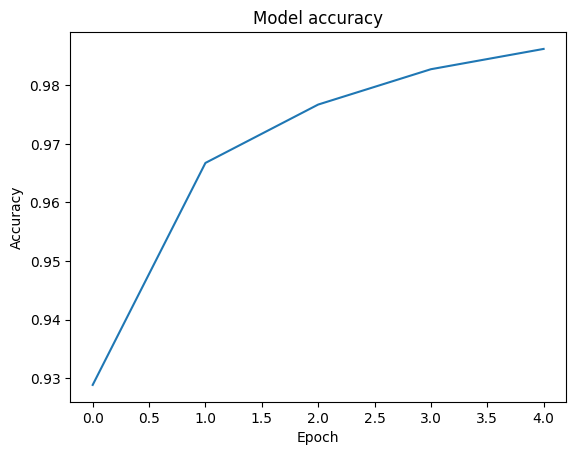

In [14]:
# Анализ результатов
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()